In [3]:
#Change md in line 18 to test different max_depth settings

In [108]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [109]:
train= pd.read_csv("/Users/laurengarrett/Documents/Masters/Fundamentals of Machine learning for Data Analytics/Group Project/Data/CS98XRegressionTrain.csv", low_memory=False)
test= pd.read_csv("/Users/laurengarrett/Documents/Masters/Fundamentals of Machine learning for Data Analytics/Group Project/Data/CS98XRegressionTest.csv",low_memory=False)

In [110]:
train.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [112]:
train["top genre"].value_counts()

adult standards           68
album rock                66
dance pop                 61
brill building pop        16
glam rock                 16
                          ..
australian talent show     1
classic girl group         1
alternative rock           1
baroque pop                1
neo mellow                 1
Name: top genre, Length: 86, dtype: int64

In [113]:
sample_nas = train[train.isnull().any(axis=1)].head()
sample_nas

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
8,9,Someone Elses Roses,Joan Regan,NaN,2019,100,14,29,-10,15,32,143,89,3,34
26,27,Drinks On The House,Green Martini Keys,NaN,2016,97,16,57,-16,11,15,181,100,5,28
72,73,Pachuko Hop,Ike Carpenter Orchestra,NaN,2006,83,53,48,-9,34,80,135,59,3,28
90,91,Little Things Means A Lot,Jayne Mansfield,NaN,2008,109,29,70,-15,16,63,172,36,4,29


In [114]:
#drop rows with missing values
train = train.dropna()
test.iloc[66,3] = 'adult standards'
test.iloc[66,:]

Id                         520
title         We Are The World
artist       U.S.A. For Africa
top genre      adult standards
year                      1985
bpm                         73
nrgy                        45
dnce                        53
dB                         -15
live                         7
val                         29
dur                        427
acous                       19
spch                         4
Name: 66, dtype: object

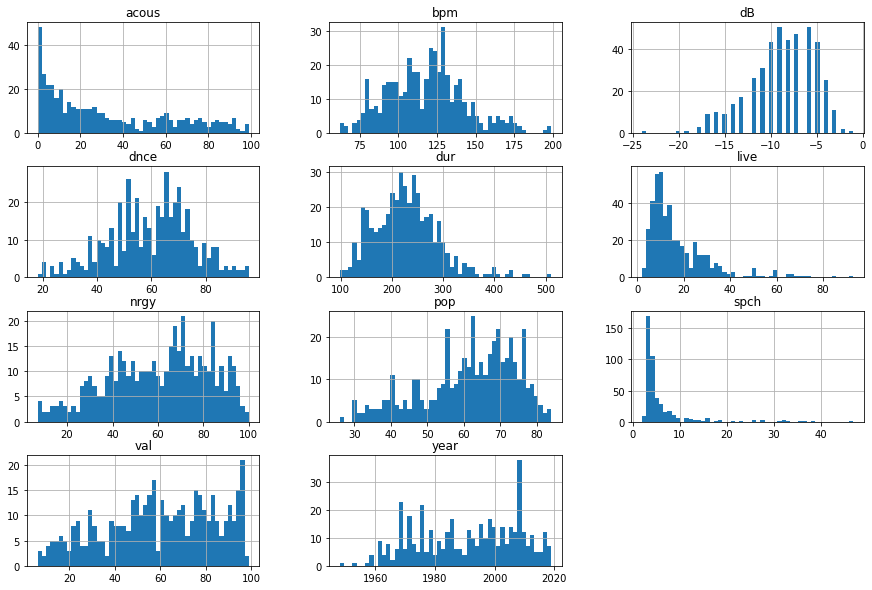

In [115]:
%matplotlib inline
train.drop(['Id'],axis=1).hist(bins=50, figsize=(15,10))
plt.show()

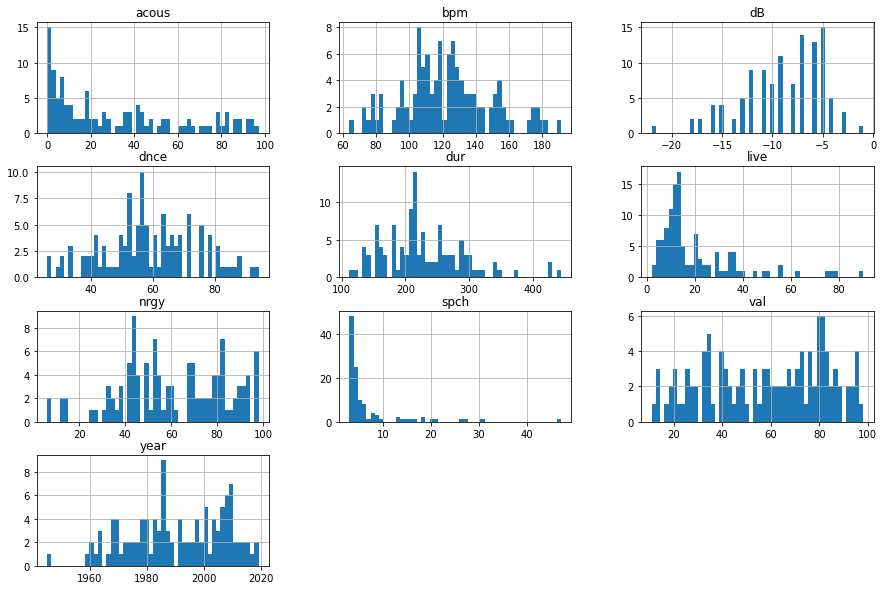

In [116]:
%matplotlib inline
test.drop(['Id'],axis=1).hist(bins=50, figsize=(15,10))
plt.show()
#test and train set roughly follow the same distribution

In [117]:
#Separate X and Y for train set
X_train = train.iloc[:,2:14] # Remove Id and title column
Y_train = train.iloc[:,14:]
X_train

,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3
2,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3
3,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3
4,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3
5,Bruno Mars,pop,2010,110,56,71,-7,12,23,223,15,6
...,...,...,...,...,...,...,...,...,...,...,...,...
448,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4
449,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3
450,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14
451,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8


In [118]:
#Change year to decade
def decade(n):
    modulus = n%10
    return n-modulus
X_train['year'] = decade(X_train['year'])
X_train['year']

0      1990
2      1970
3      1980
4      1970
5      2010
       ... 
448    1950
449    2010
450    2000
451    2000
452    2000
Name: year, Length: 438, dtype: int64

In [119]:
#One-hot years

train_years = X_train['year'] # Get data

year_cat_encoded, year_cat_name = train_years.factorize()

#Train encoder
yearenc = OneHotEncoder(handle_unknown = 'ignore') # handle_unknown ignore will return NAs with 0
yearenc.fit(year_cat_encoded.reshape(-1,1)) # yearenc is the encoder function for years data

#Transform data
year_enc_data = pd.DataFrame(yearenc.transform(year_cat_encoded.reshape(-1,1)).toarray())
year_enc_data.index = X_train.index
year_enc_data.columns = year_cat_name
year_enc_data

,1990,1970,1980,2010,2000,1960,1950,1940
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
448,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
449,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
450,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
451,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [120]:
#One-Hot artists

train_artists = X_train['artist']

artist_cat_encoded, artist_cat_name = train_artists.factorize()

#Train encoder
artenc = OneHotEncoder(handle_unknown = 'ignore')
artenc.fit(artist_cat_encoded.reshape(-1,1))

#Transform data
artist_enc_data = pd.DataFrame(artenc.transform(artist_cat_encoded.reshape(-1,1)).toarray())

# Replace column codes with column names
artist_enc_data.columns = artist_cat_name
artist_enc_data.index = X_train.index
artist_enc_data

,Connie Francis,Bee Gees,Barbra Streisand,Elton John,Bruno Mars,The Guess Who,Boyz II Men,Timi Yuro,Blue,The Beau Brummels,...,Captain Hollywood Project,New Order,Pat Boone,Britney Spears,Matthew Wilder,The Searchers,Frankie Valli & The Four Seasons,Peter And Gordon,Nelly,*NSYNC
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [121]:
# rename top genre
X_train.rename(columns={'top genre':'top_genre'}, inplace=True)
test.rename(columns={'top genre':'top_genre'}, inplace=True)

In [122]:
#One-Hot top_genre

train_top_genre = X_train['top_genre']

genre_cat_encoded, genre_cat_name = train_top_genre.factorize()

#Train encoder
top_genreenc = OneHotEncoder(handle_unknown = 'ignore')
top_genreenc.fit(genre_cat_encoded.reshape(-1,1))

#Transform data
top_genre_enc_data = pd.DataFrame(top_genreenc.transform(genre_cat_encoded.reshape(-1,1)).toarray())
top_genre_enc_data.columns = genre_cat_name
top_genre_enc_data.index = X_train.index
top_genre_enc_data

,adult standards,glam rock,pop,album rock,boy band,brill building pop,rock-and-roll,country rock,canadian pop,dance pop,...,hi-nrg,louisiana blues,hip pop,mellow gold,avant-garde jazz,bronx hip hop,glam punk,german alternative rock,acoustic blues,alternative rock
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
#Separate categorical and numerical attributes to allow scaling
cat_attribs = ['artist','year','top_genre']
X_train_num = X_train.drop(cat_attribs, axis=1)
num_attribs = list(X_train_num)

In [124]:
# Run this to scale the data
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
X_train_num[num_attribs] = std_scaler.fit_transform(X_train_num[num_attribs])

#No need to run for decision tree

In [125]:
#Merge categorical and numerical data
X_train_prepared = X_train_num.join(year_enc_data)
X_train_prepared = X_train_prepared.join(artist_enc_data)
X_train_prepared = X_train_prepared.join(top_genre_enc_data)
X_train_prepared # Final data

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,1990,...,hi-nrg,louisiana blues,hip pop,mellow gold,avant-garde jazz,bronx hip hop,glam punk,german alternative rock,acoustic blues,alternative rock
0,-0.450411,-1.337201,-0.960594,0.219596,-0.333898,-1.293363,-1.235386,1.463706,-0.480003,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.529944,-1.110591,0.209212,-0.059196,-0.333898,0.301586,0.264116,-0.724593,-0.480003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.054860,-1.473166,-0.830616,-2.010740,-0.333898,-1.088882,0.058921,-0.245903,-0.480003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.106316,-0.612051,-0.245713,0.219596,-0.188883,-0.802610,-0.556664,0.437941,-0.480003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.331113,-0.204155,0.729126,0.498388,-0.406405,-1.497844,-0.083137,-0.587824,0.059077,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,-1.524099,-1.745097,-2.715304,-2.289532,-0.551419,-1.784116,-0.225196,2.044972,-0.300310,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,1.180003,0.928890,-0.440680,-1.174364,0.391175,1.487573,-1.282739,0.608902,-0.480003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450,1.975327,-0.249477,0.859104,0.219596,0.173653,0.056209,0.958622,-0.314287,1.496626,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451,1.856029,1.200821,0.274201,1.055972,-0.841448,1.160404,-0.588233,-0.929746,0.418465,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
#Get test set
X_test = test.iloc[:,2:14] # Remove Id and title column
X_test.isnull().sum().sum()

0

In [129]:
#Transform years in test data

X_test['year'] = decade(X_test['year']) # Convert to decades
test_years = pd.DataFrame(X_test['year']) 

test_year_enc_data = pd.DataFrame(yearenc.transform(test_years).toarray()) # Use yearenc from earlier to transform data
test_year_enc_data.index = X_test.index
test_year_enc_data.columns = year_cat_name 
test_year_enc_data

,1990,1970,1980,2010,2000,1960,1950,1940
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
#Transform artists in test data
 
test_artists = pd.DataFrame(X_test['artist'])

test_artist_enc_data = pd.DataFrame(artenc.transform(test_artists).toarray())
test_artist_enc_data.columns = artist_cat_name
test_artist_enc_data.index = X_test.index
test_artist_enc_data

,Connie Francis,Bee Gees,Barbra Streisand,Elton John,Bruno Mars,The Guess Who,Boyz II Men,Timi Yuro,Blue,The Beau Brummels,...,Captain Hollywood Project,New Order,Pat Boone,Britney Spears,Matthew Wilder,The Searchers,Frankie Valli & The Four Seasons,Peter And Gordon,Nelly,*NSYNC
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
#Transform top_genre in test data
 
test_top_genre = pd.DataFrame(X_test['top_genre'])

test_top_genre_enc_data = pd.DataFrame(top_genreenc.transform(test_top_genre).toarray())
test_top_genre_enc_data.columns = genre_cat_name
test_top_genre_enc_data.index = X_test.index
test_top_genre_enc_data

,adult standards,glam rock,pop,album rock,boy band,brill building pop,rock-and-roll,country rock,canadian pop,dance pop,...,hi-nrg,louisiana blues,hip pop,mellow gold,avant-garde jazz,bronx hip hop,glam punk,german alternative rock,acoustic blues,alternative rock
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
X_test_num = X_test.drop(cat_attribs, axis=1)
X_test_prepared = X_test_num.join(test_year_enc_data)
X_test_prepared = X_test_prepared.join(test_artist_enc_data)
X_test_prepared = X_test_prepared.join(test_top_genre_enc_data)
X_test_prepared # Final data

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,1990,...,hi-nrg,louisiana blues,hip pop,mellow gold,avant-garde jazz,bronx hip hop,glam punk,german alternative rock,acoustic blues,alternative rock
0,154,93,65,-3,75,74,213,1,18,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,161,39,30,-15,11,14,292,26,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,64,46,27,-7,12,18,179,38,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,127,92,71,-9,37,53,216,6,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,115,46,56,-12,21,34,153,18,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,125,57,61,-8,38,76,209,3,47,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,130,89,67,-6,10,80,215,4,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,84,58,78,-7,14,76,253,43,27,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,127,97,72,-5,12,73,287,6,14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
# Drop dB and nrgy
X_train_prepared= X_train_prepared.drop(['dB','nrgy'],axis=1)
X_test_prepared= X_test_prepared.drop(['dB','nrgy'],axis=1)

In [134]:
preds = pd.DataFrame(preds)

NameError: name 'preds' is not defined

In [135]:
#Prepare predictions to submit
preds.columns = ['pop']
test_ids = pd.DataFrame(test['Id'])
test_ids
preds = test_ids.join(preds)
preds.reset_index(drop=True, inplace=True)

NameError: name 'preds' is not defined

In [136]:
fn =str("DT Preds md = " + str(md)) # file name
preds.to_csv(fn + '.csv',index = False)

NameError: name 'md' is not defined

In [ ]:
#Bestpreds

In [75]:
#Best md = 8
#Best score = 0.35714

In [96]:
#Decision Tree Regression

In [137]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X_train_prepared, Y_train)

DecisionTreeRegressor(max_depth=2)

In [138]:
#Check fit
tree_train_preds = tree_reg.predict(X_train_prepared) 

In [139]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(Y_train, tree_train_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

10.439025707503438

In [140]:
tree_reg1 = DecisionTreeRegressor(max_depth=5)
tree_reg1.fit(X_train_prepared, Y_train)

DecisionTreeRegressor(max_depth=5)

In [167]:
tree_reg2=DecisionTreeRegressor(max_depth=2,random_state=1)
tree_reg2.fit(X_train_prepared, Y_train)

DecisionTreeRegressor(max_depth=2, random_state=1)

In [184]:
tree_reg3=DecisionTreeRegressor(max_depth=3,random_state=1)
tree_reg3.fit(X_train_prepared, Y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [187]:
tree_reg4=DecisionTreeRegressor(max_depth=1,random_state=1)
tree_reg4.fit(X_train_prepared, Y_train)

DecisionTreeRegressor(max_depth=1, random_state=1)

In [188]:
#Predict
tree_test_preds = tree_reg.predict(X_test_prepared)
tree_test_preds1 = tree_reg1.predict(X_test_prepared)
tree_test_preds2 = tree_reg2.predict(X_test_prepared)
tree_test_preds3 = tree_reg3.predict(X_test_prepared)
tree_test_preds4 = tree_reg4.predict(X_test_prepared)

In [169]:
#Make predictions
tree_test_preds = tree_reg.predict(X_test_prepared)
tree_test_preds

array([59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       66.73913043, 59.65555556, 66.73913043, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65

In [170]:
#Make predictions
tree_test_preds1 = tree_reg1.predict(X_test_prepared)
tree_test_preds1

array([81.        , 81.        , 81.        , 81.        , 81.        ,
       81.        , 81.        , 81.        , 81.        , 81.        ,
       81.        , 81.        , 81.        , 81.        , 81.        ,
       67.10843373, 81.        , 67.10843373, 81.        , 81.        ,
       81.        , 81.        , 81.        , 81.        , 81.        ,
       81.        , 81.        , 81.        , 81.        , 81.        ,
       81.        , 81.        , 81.        , 81.        , 81.        ,
       81.        , 81.        , 81.        , 81.        , 81.        ,
       81.        , 81.        , 81.        , 81.        , 81.        ,
       81.        , 81.        , 81.        , 81.        , 81.        ,
       81.        , 81.        , 81.        , 81.        , 81.        ,
       81.        , 81.        , 81.        , 81.        , 81.        ,
       81.        , 81.        , 81.        , 81.        , 81.        ,
       81.        , 81.        , 81.        , 81.        , 81.  

In [171]:
#Make predictions
tree_test_preds2 = tree_reg2.predict(X_test_prepared)
tree_test_preds2

array([59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       66.73913043, 59.65555556, 66.73913043, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65555556,
       59.65555556, 59.65555556, 59.65555556, 59.65555556, 59.65

In [186]:
#Make predictions
tree_test_preds3 = tree_reg3.predict(X_test_prepared)
tree_test_preds3

array([61.50649351, 61.50649351, 61.50649351, 61.50649351, 61.50649351,
       61.50649351, 61.50649351, 61.50649351, 61.50649351, 61.50649351,
       61.50649351, 61.50649351, 61.50649351, 61.50649351, 61.50649351,
       66.89243028, 61.50649351, 66.89243028, 61.50649351, 61.50649351,
       61.50649351, 61.50649351, 61.50649351, 61.50649351, 61.50649351,
       61.50649351, 61.50649351, 61.50649351, 61.50649351, 61.50649351,
       61.50649351, 61.50649351, 61.50649351, 61.50649351, 61.50649351,
       61.50649351, 61.50649351, 61.50649351, 61.50649351, 61.50649351,
       61.50649351, 61.50649351, 61.50649351, 61.50649351, 61.50649351,
       61.50649351, 61.50649351, 61.50649351, 61.50649351, 61.50649351,
       61.50649351, 61.50649351, 61.50649351, 61.50649351, 61.50649351,
       61.50649351, 61.50649351, 61.50649351, 61.50649351, 61.50649351,
       61.50649351, 61.50649351, 61.50649351, 61.50649351, 61.50649351,
       61.50649351, 61.50649351, 61.50649351, 61.50649351, 61.50

In [189]:
#Make predictions
tree_test_preds4 = tree_reg4.predict(X_test_prepared)
tree_test_preds4

array([64.88046647, 64.88046647, 64.88046647, 64.88046647, 64.88046647,
       64.88046647, 64.88046647, 64.88046647, 64.88046647, 64.88046647,
       64.88046647, 64.88046647, 64.88046647, 64.88046647, 64.88046647,
       64.88046647, 64.88046647, 64.88046647, 64.88046647, 64.88046647,
       64.88046647, 64.88046647, 64.88046647, 64.88046647, 64.88046647,
       64.88046647, 64.88046647, 64.88046647, 64.88046647, 64.88046647,
       64.88046647, 64.88046647, 64.88046647, 64.88046647, 64.88046647,
       64.88046647, 64.88046647, 64.88046647, 64.88046647, 64.88046647,
       64.88046647, 64.88046647, 64.88046647, 64.88046647, 64.88046647,
       64.88046647, 64.88046647, 64.88046647, 64.88046647, 64.88046647,
       64.88046647, 64.88046647, 64.88046647, 64.88046647, 64.88046647,
       64.88046647, 64.88046647, 64.88046647, 64.88046647, 64.88046647,
       64.88046647, 64.88046647, 64.88046647, 64.88046647, 64.88046647,
       64.88046647, 64.88046647, 64.88046647, 64.88046647, 64.88

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

In [145]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train, tree_train_preds))

Mean Absolute Error: 8.489928206485681


In [146]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_train, tree_train_preds))

Mean Squared Error: 108.97325772191765


In [147]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(Y_train, tree_train_preds)))

Root Mean Squared Error: 2.9137481371054843


In [172]:
fn = X_train_prepared.columns
tn = Y_train.columns

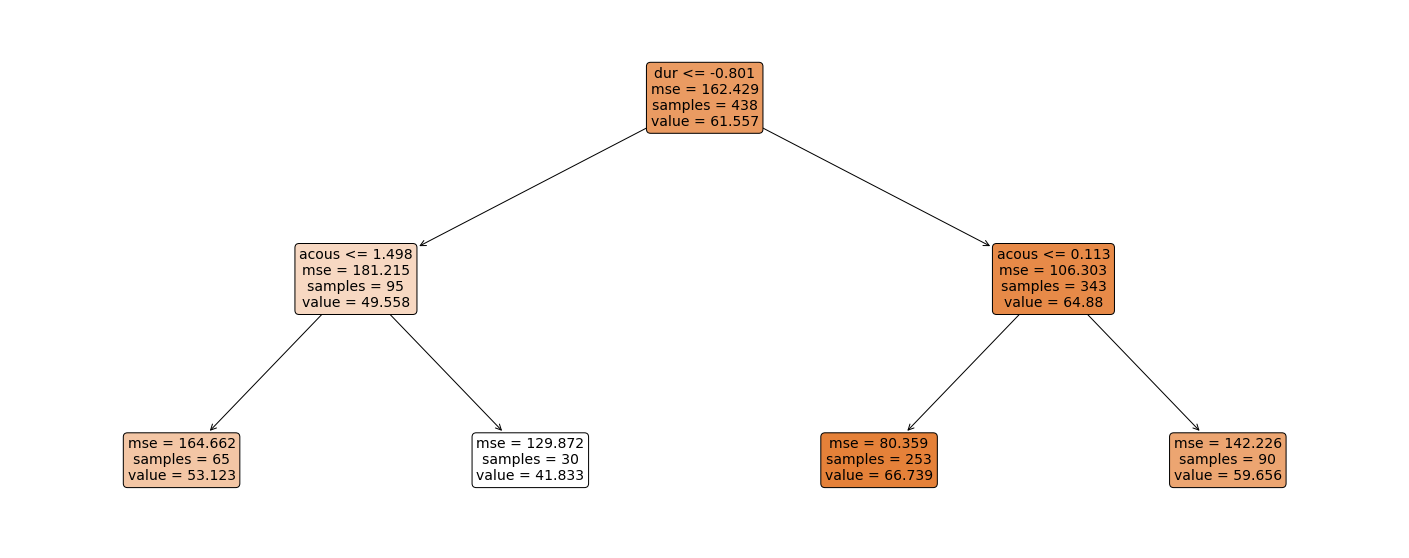

In [175]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
tree = plot_tree(tree_reg, 
              feature_names=fn, 
              class_names=tn, 
              filled=True, 
              rounded=True, 
              fontsize=14)

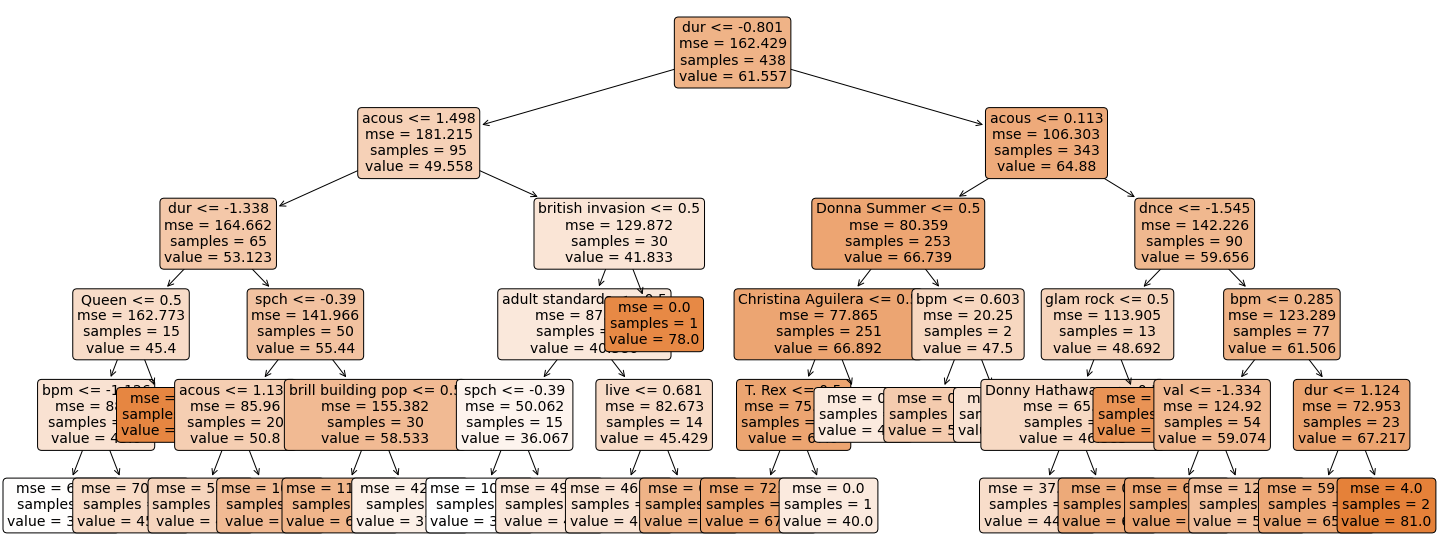

In [174]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
tree = plot_tree(tree_reg1, 
              feature_names=fn, 
              class_names=tn, 
              filled=True, 
              rounded=True, 
              fontsize=14)

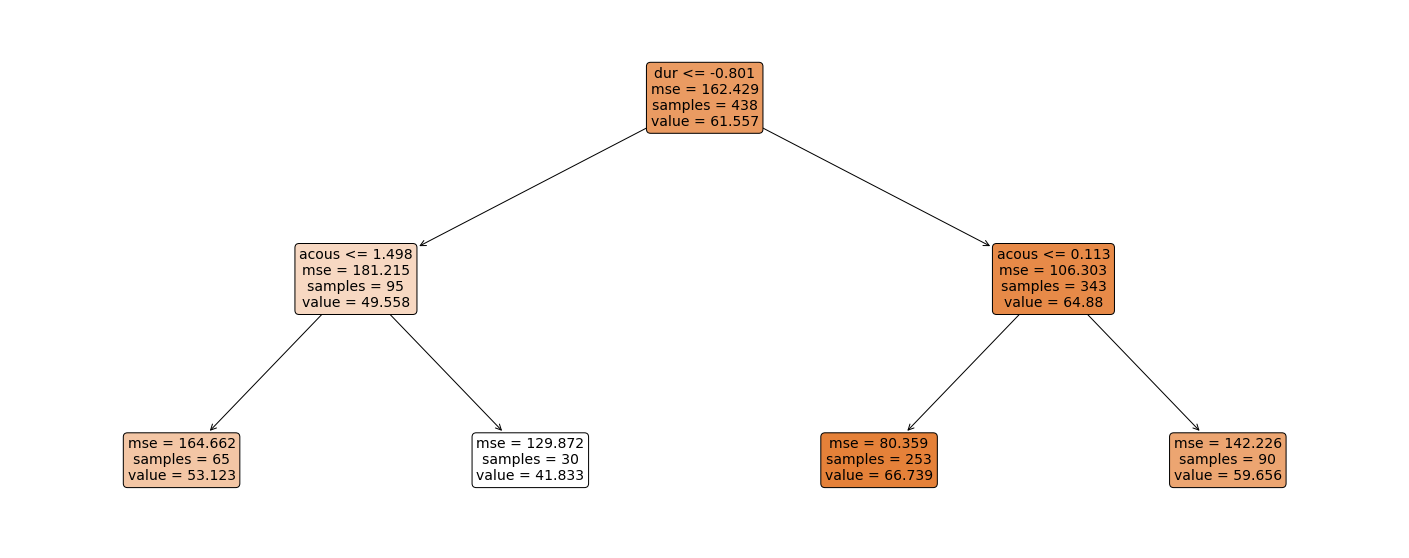

In [176]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
tree = plot_tree(tree_reg2, 
              feature_names=fn, 
              class_names=tn, 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [177]:
#Prepare predictions to submit
tree_train_preds.columns = ['pop']
test_ids = pd.DataFrame(test['Id'])
test_ids
tree_train_preds = test_ids.join(tree_train_preds)
preds.reset_index(drop=True, inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'